In [ ]:
path = r"C:\\Users\\rachi\\Desktop\\Udemy_Courses\\Python for Computer Vision with OpenCV and Deep Learning\\Materials\\Computer-Vision-with-Python\\DATA\\00-puppy.jpg"


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
path1 = r"C:\\Users\\rachi\\Desktop\\Udemy_Courses\\Python for Computer Vision with OpenCV and Deep Learning\\Materials\\Computer-Vision-with-Python\\DATA\\dog_backpack.png"
path2 = r"C:\\Users\\rachi\\Desktop\\Udemy_Courses\\Python for Computer Vision with OpenCV and Deep Learning\\Materials\\Computer-Vision-with-Python\\DATA\\watermark_no_copy.png"


In [3]:
img1 = cv2.imread(path1)

In [4]:
img2 = cv2.imread(path2)

In [7]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

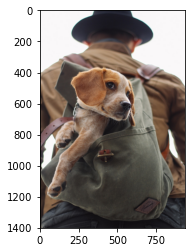

In [8]:
plt.imshow(img1)

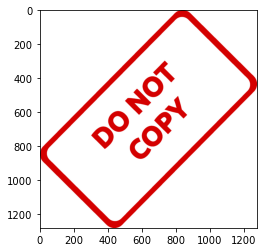

In [9]:
plt.imshow(img2)

## Different sized images can create problems. We have to create masks to operate in such scenarios

In [10]:
img1.shape

(1401, 934, 3)

In [11]:
img2.shape

(1280, 1277, 3)

## Right now not creating mask, rather simply resizing the images

In [12]:
img1 =cv2.resize(img1,(1200,1200))
img2 =cv2.resize(img2,(1200,1200))

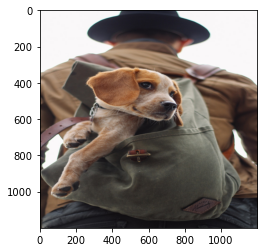

In [13]:
plt.imshow(img1)

### Blending the Image

We will blend the values together with the formula:

$$  img1 * \alpha  + img2 * \beta  + \gamma $$

In [14]:
blended_img = cv2.addWeighted(src1=img1, alpha=0.7, src2 = img2, beta= 0.5, gamma = 0.3)

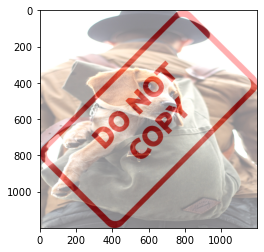

In [15]:
plt.imshow(blended_img)

## Overlay images of different sizes

In [28]:
## overlay small image on top of larger image (No Blending)

## This is not blending, we are simply adding small imaqge on top of large image

img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 =cv2.resize(img2,(600,600))

In [24]:
large_img = img1
small_img = img2

In [25]:
x_offset = 0
y_offset = 0

In [26]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img
#### This is tricky, numpy thinks horizontal row as 2nd axis whereas open cv thinks horizontal row as 1st axis

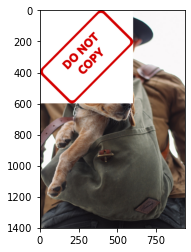

In [27]:
plt.imshow(large_img)

## Blending images of Different sizes

In [58]:
import cv2
import numpy as np

img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 =cv2.resize(img2,(600,600))

In [59]:
## We want a 600x600 space on img1 where we will blend image 2
## This will be our ROI

In [60]:
img1.shape

(1401, 934, 3)

In [61]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [62]:
img2.shape

(600, 600, 3)

In [63]:
rows,cols,channels = img2.shape

In [64]:
## Grabbing the ROI, have selected bottom right corner

In [65]:
roi = img1[y_offset:,x_offset:]

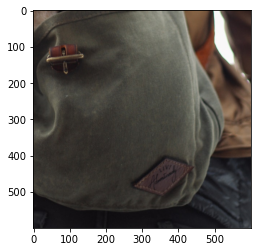

In [66]:
plt.imshow(roi)

In [67]:
roi.shape

(600, 600, 3)

In [68]:
## Creating a mask and its inverse mask as well

In [69]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

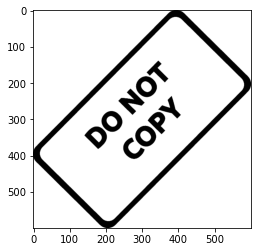

In [70]:
plt.imshow(img2gray, cmap = 'gray')

In [71]:
mask_inv = cv2.bitwise_not(img2gray)

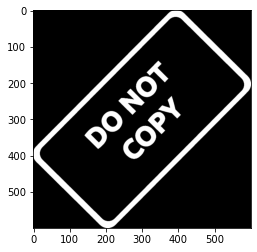

In [72]:
plt.imshow(mask_inv,cmap='gray')

In [73]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [74]:
white_background

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [75]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [76]:
## Now we have inverse mask across all 3 channels

In [77]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

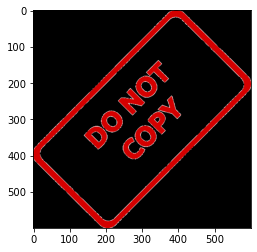

In [78]:
plt.imshow(fg)

In [79]:
final_roi = cv2.bitwise_or(roi,fg)

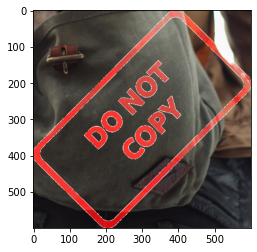

In [80]:
plt.imshow(final_roi)

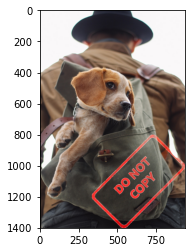

In [81]:
large_img = img1
small_img = final_roi


large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)